# Complex Numbers


### Peter Onyisi
<img src="images/texas_logo.png" width="400" align="left"/>

In [2]:
# TACC: install if necessary
try:
    import numba
except:
    ! pip3 install --user numba numpy==1.19.1 scipy==1.5.2 tqdm==4.48.2
    INSTALL_PATH='/home/jupyter/mydata/jupyter_packages/lib/python3.6/site-packages'
    import sys, os
    if os.access(INSTALL_PATH, os.R_OK) and INSTALL_PATH not in sys.path:
        sys.path.insert(0, INSTALL_PATH)

# generic
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8,6)
matplotlib.rcParams['font.size'] = 16
matplotlib.rcParams['animation.embed_limit'] = 60
matplotlib.rcParams['xtick.top'] = True
matplotlib.rcParams['ytick.right'] = True
import math
import numpy
import scipy.integrate
import scipy.stats
import scipy.special
from matplotlib import animation

## Why complex numbers?

The original impetus for complex numbers was the fact that it is possible to write polynomial equations where all the coefficients are real numbers, such as 
$$x^2 + 1 = 0,$$
which have no solution where $x$ is a real number. By introducing the new _imaginary_ number $i$ such that $i^2 = -1$, but which otherwise behaves the same way as real numbers (you can add and multiply it by real numbers, it commutes, etc.), we can get solutions to all these equations. In fact, if we create the _complex numbers_ $a + bi$ where $a$ and $b$ are real numbers, it is possible to prove that all polynomial equations whose coefficients are complex numbers have solutions that are also complex numbers (this is called the *fundamental theorem of algebra*, and the complex numbers are termed *algebraically closed*).

This algebraic property is not, usually, the immediate reason we are interested in complex numbers in physics. The most immediate use for them is, instead, that they have a very useful geometric interpretation. Since the number $i$ is linearly independent of all real numbers - i.e., you can't get it by multiplying two real numbers together - and we can multiply $i$ by real numbers as we wish, we can consider the complex numbers as a two-dimensional real vector space, where $1$ is a vector pointing in one direction and $i$ is a vector pointing in a perpendicular direction. We usually identify $1$ with the $x$ axis and $i$ with the $y$ axis, allowing us to represent complex numbers as vectors from the origin to points on the *complex plane*.

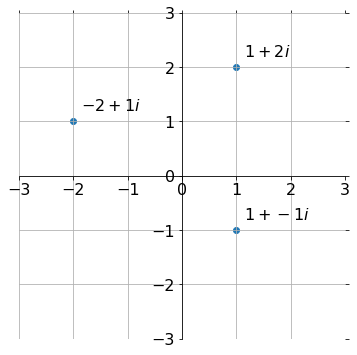

In [31]:
fig = plt.figure()
plt.grid()
ax = plt.gca()
ax.set_xlim(-3,3)
ax.set_ylim(-3,3)
ax.set_aspect('equal')
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
avals = [1, -2, 1]
bvals = [2, 1, -1]
plt.scatter(avals, bvals)
for a, b in zip(avals, bvals):
    plt.annotate(f'${a}+{b}i$', (a, b), xytext=(a+0.15,b+0.2))
plt.show()

We can choose to write a complex number $z$ either using "Cartesian" coordinates $a$ and $b$ ($z = a+ib$) or using "polar" coordinates $r$ and $\theta$ ($z = r\cos\theta + i r \sin\theta$). When we use polar coordinate representation, we refer to $r$ as the *magnitude* and to $\theta$ as the *phase* of the complex number.

The magnitude $r$ of the complex number $z = a+ib$ is $|z| = \sqrt{a^2 + b^2} = \sqrt{(a+ib)(a-ib)}$. We refer to $z^* = a-ib$ as the *complex conjugate* of $z$; then $r = \sqrt{z^*z} = |z|$.  **Note that $|z|^2 = z^*z$ is *not* the same as $z^2 = zz$!**

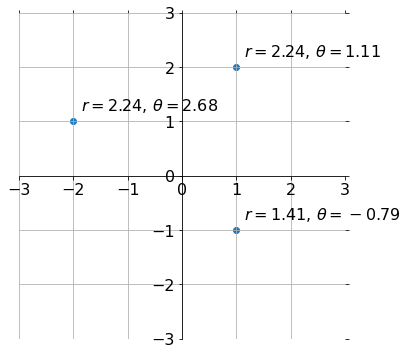

In [36]:
fig = plt.figure()
plt.grid()
ax = plt.gca()
ax.set_xlim(-3,3)
ax.set_ylim(-3,3)
ax.set_aspect('equal')
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
avals = [1, -2, 1]
bvals = [2, 1, -1]
plt.scatter(avals, bvals)
for a, b in zip(avals, bvals):
    plt.annotate(fr'$r={math.sqrt(a**2+b**2):.2f}$, $\theta={math.atan2(b,a):.2f}$', (a, b), xytext=(a+0.15,b+0.2))
plt.show()

What complex numbers bring to the discussion of a two-dimensional plane is that, unlike a plain vector with coordinates $[a, b]$, the complex number $a+ib$ has multiplication defined for it. Let's multiply two complex numbers $z_1 = r_1 \cos\theta_1 + ir_1 \sin\theta_1$ and $z_2=r_2 \cos\theta_2 + ir_2 \sin\theta_2$:

$$
\begin{align*}
z_1 z_2 &= (r_1 \cos\theta_1 + ir_1 \sin\theta_1)(r_2 \cos\theta_2 + ir_2 \sin\theta_2)\\
&= r_1 (\cos\theta_1 + i \sin\theta_1)r_2(\cos\theta_2 + i \sin\theta_2)\\
&= r_1 r_2 (\cos\theta_1\cos\theta_2 + i\sin\theta_1 \cos\theta_2 + i\cos\theta_1 \sin\theta_2 + i^2\sin\theta_1 \sin\theta_2)\\
&= r_1 r_2 \left[(\cos\theta_1\cos\theta_2 - \sin\theta_1\sin\theta_2) + i(\sin\theta_1 \cos\theta_2 + \cos\theta_1 \sin\theta_2)\right]\\
&= r_1 r_2 \cos(\theta_1+\theta_2) + ir_1 r_2 \sin(\theta_1 + \theta_2)
\end{align*}
$$

So we find $z_1 z_2$ is a complex number of magnitude $r_1 r_2$ with phase $\theta_1 + \theta_2$. If we imagine we start with $z_1$ as a vector on the complex plane, then multiplication by $z_2$ rotates the vector by an angle $\theta_2$ counterclockwise, and scales the magnitude of the vector by the factor $r_2$.

Complex numbers of magnitude 1 are frequently termed *pure phase*. When a complex number is multiplied by a pure phase, it will just be rotated by the phase.

### Euler's Formula

There is a very nice representation of complex numbers, related to polar coordinates, that shows up again and again. It exploits *Euler's Formula,* which is the result that
$$ e^{i\theta} = \cos\theta + i\sin\theta $$
which means that we can translate
$$ r\cos\theta + ir\sin\theta = r(\cos\theta + i\sin\theta) = re^{i\theta} $$

We can convert to and from the Cartesian expression:

$$
\begin{align*}
re^{i\theta} &= r\cos\theta + ir\sin\theta\\
a + ib &= \sqrt{a^2 + b^2} e^{i\arctan(b/a)}
\end{align*}
$$

Multiplication of complex in this representation neatly captures the rule above for the multiplication of complex numbers $z_1 = r_1 \cos\theta_1 + ir_1\sin\theta_1 = r_1 e^{i\theta_1}$ and $z_2 = r_2 \cos\theta_2 + ir_2\sin\theta_2 = r_2 e^{i\theta_2}$:

$$ z_1 z_2 = r_1 e^{i\theta_1} r_2 e^{i\theta_2} = r_1 r_2 e^{i\theta_1 + i\theta_2} = r_1 r_2 e^{i(\theta_1+\theta_2)} $$

The downside is that it is of course much less useful for *adding* complex numbers, since exponentials don't behave simply under addition.

The complex conjugate of $z = re^{i\theta}$ is $z^* = re^{-i\theta}$; so $z^* z = re^{i\theta}re^{-i\theta} = r^2$.

Euler's Formula leads us to the famous relationships
$$
\begin{align*}
e^{\pi i} + 1 &= (-1 + 0i) + 1 = 0\\
e^{2\pi i} &= 1 + 0i = 1
\end{align*}
$$

A standard proof of Euler's Formula: we use the Taylor (in this case, Maclaurin) expansion of the exponential:

$$
\begin{align*}
\exp(i\theta) =&\ 1 + \frac{i\theta}{1!} + \frac{(i\theta)^2}{2!} + \frac{(i\theta)^3}{3!} + \frac{(i\theta)^4}{4!} \\
&  + \frac{(i\theta)^5}{5!} +\frac{(i\theta)^6}{6!} +\frac{(i\theta)^7}{7!} + \cdots\\
 =&\ 1 + i\theta + \frac{-\theta^2}{2!} + \frac{-i\theta^3}{3!} + \frac{\theta^4}{4!} \\
&  + \frac{i\theta^5}{5!} +\frac{-\theta^6}{6!} +\frac{-i\theta^7}{7!} + \cdots\\
=&\ \left[1 +\frac{-\theta^2}{2!}+ \frac{\theta^4}{4!}+\frac{-\theta^6}{6!} + \cdots\right]
  \\
& +i\left[\theta + \frac{-\theta^3}{3!} + \frac{\theta^5}{5!}  +\frac{-\theta^7}{7!} + \cdots\right]\\
\end{align*}
$$

But we may recognize the Maclaurin series for $\cos\theta$ and $\sin\theta$ in the real and imaginary parts of the sums:

$$ \exp(i\theta) = \cos\theta + i\sin\theta $$

Suppose we have a complex valued function of some parameter, e.g. time:

$$ f(t) = a(t) + ib(t) = r(t)e^{i\theta(t)} $$ 

We can take a derivative in the normal way ($i$ is a constant):

$$
\begin{align*}
\frac{df}{dt} &= \frac{da}{dt} + i\frac{db}{dt} & \textrm{(Cartesian)}\\
&= \frac{dr}{dt}e^{i\theta(t)} + r(t)i\frac{d\theta}{dt}e^{i\theta(t)} & \textrm{(Polar)}
\end{align*}
$$

One or the other parametrization may be convenient. For example, if we know that $r(t) = r$ is a constant,

$$ \frac{df}{dt} = r\frac{d\theta}{dt}\left[ie^{i\theta(t)}\right] $$

Since $i = e^{i(\pi/2)}$, this means that the phase of $df/dt$ is $\theta + \pi/2$, i.e. it is rotated 90 degrees counterclockwise.  This corresponds to the fact for a particle moving in a circle, the velocity ($df/dt$) is perpendicular to the radial vector to the origin ($f$).

### Key points
   * Complex numbers involve a sum of a real number and an imaginary number; imaginary numbers are real numbers times the value $i = \sqrt{-1}$.
   * The typical representations of complex numbers are as a "Cartesian" sum $a + ib$ and as a "polar" product $re^{i\theta}$. These can be converted between each other and one or the other may be preferred for a specific operation.
   * Calculus operates in the normal way for complex numbers; just remember that the real and imaginary parts (or the magnitude and phase) are independent functions.